Тетрадка предназначена для студентов образвательного проекта Booster MDS использование вне проекта запрещено.

##### Задания не несут смысловой нагрузки для реальной жизни, они сделаны лишь для того, чтоб научить использовать Pandas

#### Каждое задание оценивает в 1 балл, для успешной сдачи задания нужно набрать 12 баллов

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 1.

https://www.kaggle.com/ronitf/heart-disease-uci

___

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('heart_pandas.csv')

In [3]:
data.head(5)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,non-anginal pain,145,233,greater than 120mg/ml,normal,150,no,2.3,upsloping,0,normal,1
1,37,male,atypical angina,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,upsloping,0,fixed defect,1
2,41,female,typical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,flat,0,fixed defect,1
3,56,male,typical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,flat,0,fixed defect,1
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,flat,0,fixed defect,1


#### Описание признаков

**age**: The person's age in years

**sex**: The person's sex (1 = male, 0 = female)

**cp**: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

**trestbps**: The person's resting blood pressure (mm Hg on admission to the hospital)

**chol**: The person's cholesterol measurement in mg/dl

**fbs**: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

**restecg**: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

**thalach**: The person's maximum heart rate achieved

**exang**: Exercise induced angina (1 = yes; 0 = no)

**oldpeak**: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

**slope**: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

**ca**: The number of major vessels (0-3)

**thal**: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

**target**: Heart disease (0 = no, 1 = yes)

> 1. age 
> 2. sex 
> 3. chest pain type (4 values) 
> 4. resting blood pressure 
> 5. serum cholestoral in mg/dl 
> 6. fasting blood sugar > 120 mg/dl
> 7. resting electrocardiographic results (values 0,1,2)
> 8. maximum heart rate achieved 
> 9. exercise induced angina 
> 10. oldpeak = ST depression induced by exercise relative to rest 
> 11. the slope of the peak exercise ST segment 
> 12. number of major vessels (0-3) colored by flourosopy 
> 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

___

**Сколько мужчин в датасете? Сколько женщен? (sex) **

In [4]:
## Ваш код 
##(Вариант 1)
data.sex.value_counts()

male      207
female     96
Name: sex, dtype: int64

In [5]:
##(Вариант 2)
group=data.groupby("sex")
group["sex"].count()

sex
female     96
male      207
Name: sex, dtype: int64

In [6]:
##Вариант 3
male=len(data[data.sex=="male"])
female=len(data[data.sex=="female"])

In [7]:
## Ваш ответ (для Вариант 3)
print("Количество мужчин: ", male)
print("Количество женщин: ", female)

Количество мужчин:  207
Количество женщин:  96


 **Какой процент мужчин в датасете? (решите в одну строчку, не используя предыдущий результат. Не забудте знак процента) **

In [8]:
## Ваш код
percent = str(round(len(data[data.sex=="male"])/len(data)*100,2))+'%'

In [9]:
## Ваш ответ:
percent

'68.32%'

**Сколько мужчин имеют заболевание сердца? Сколько женщин имеют заболевание сердца? **

In [10]:
## Ваш код
group = data[data.target==1].groupby("sex")
group["sex"].count()

sex
female    72
male      93
Name: sex, dtype: int64

In [ ]:
## Ваш ответ:

**Какую долю, от общего числа пациентов, занимают мужчины не имеющие болезнь сердца?**

In [11]:
## Ваш код
men = data[data.sex == "male"]
v = round(len(men[men.target == 0])/len(data),2)
v

0.38

In [12]:
## Ваш ответ: Вариант 2
round(len(data.loc[(data['sex']=='male')&(data['target']==0)])/len(data),2)

0.38

**Сколько лет самому молодому пациенту, страдающему болезнью сердца?**

In [13]:
## Ваш код
data[data.target==1].age.min()

29

In [14]:
## Ваш ответ:(Проверка)
data.sort_values('age')

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
72,29,male,typical angina,130,204,lower than 120mg/ml,normal,202,no,0.0,flat,0,fixed defect,1
58,34,male,non-anginal pain,118,182,lower than 120mg/ml,normal,174,no,0.0,flat,0,fixed defect,1
125,34,female,typical angina,118,210,lower than 120mg/ml,ST-T wave abnormality,192,no,0.7,flat,0,fixed defect,1
239,35,male,typical angina,126,282,lower than 120mg/ml,normal,156,yes,0.0,flat,0,reversable defect,0
65,35,female,typical angina,138,183,lower than 120mg/ml,ST-T wave abnormality,182,no,1.4,flat,0,fixed defect,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,71,female,atypical angina,110,265,greater than 120mg/ml,normal,130,no,0.0,flat,1,fixed defect,1
151,71,female,typical angina,112,149,lower than 120mg/ml,ST-T wave abnormality,125,no,1.6,upsloping,0,fixed defect,1
129,74,female,typical angina,120,269,lower than 120mg/ml,normal,121,yes,0.2,flat,1,fixed defect,1
144,76,female,atypical angina,140,197,lower than 120mg/ml,left ventricular hypertrophy,116,no,1.1,upsloping,0,fixed defect,1


**Сколько лет самому возастному пациенту, у которого нет проблем с сердцем?**

In [15]:
## Ваш код
data[data.target==0].age.max()

77

In [16]:
## Ваш ответ:(Проверка)
data.sort_values('age',ascending=False)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
238,77,male,typical angina,125,304,lower than 120mg/ml,normal,162,yes,0.0,flat,3,fixed defect,0
144,76,female,atypical angina,140,197,lower than 120mg/ml,left ventricular hypertrophy,116,no,1.1,upsloping,0,fixed defect,1
129,74,female,typical angina,120,269,lower than 120mg/ml,normal,121,yes,0.2,flat,1,fixed defect,1
151,71,female,typical angina,112,149,lower than 120mg/ml,ST-T wave abnormality,125,no,1.6,upsloping,0,fixed defect,1
60,71,female,atypical angina,110,265,greater than 120mg/ml,normal,130,no,0.0,flat,1,fixed defect,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,35,male,typical angina,126,282,lower than 120mg/ml,normal,156,yes,0.0,flat,0,reversable defect,0
227,35,male,typical angina,120,198,lower than 120mg/ml,ST-T wave abnormality,130,yes,1.6,upsloping,0,reversable defect,0
125,34,female,typical angina,118,210,lower than 120mg/ml,ST-T wave abnormality,192,no,0.7,flat,0,fixed defect,1
58,34,male,non-anginal pain,118,182,lower than 120mg/ml,normal,174,no,0.0,flat,0,fixed defect,1


**Сколько лет самой молодой женщине, которая страдает болезнью сердца?**

In [17]:
## Ваш код
data.loc[(data['sex']=='female')&(data['target']==1)].age.min()

34

In [18]:
## Ваш ответ:(Проверка)
data.sort_values('age')

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
72,29,male,typical angina,130,204,lower than 120mg/ml,normal,202,no,0.0,flat,0,fixed defect,1
58,34,male,non-anginal pain,118,182,lower than 120mg/ml,normal,174,no,0.0,flat,0,fixed defect,1
125,34,female,typical angina,118,210,lower than 120mg/ml,ST-T wave abnormality,192,no,0.7,flat,0,fixed defect,1
239,35,male,typical angina,126,282,lower than 120mg/ml,normal,156,yes,0.0,flat,0,reversable defect,0
65,35,female,typical angina,138,183,lower than 120mg/ml,ST-T wave abnormality,182,no,1.4,flat,0,fixed defect,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,71,female,atypical angina,110,265,greater than 120mg/ml,normal,130,no,0.0,flat,1,fixed defect,1
151,71,female,typical angina,112,149,lower than 120mg/ml,ST-T wave abnormality,125,no,1.6,upsloping,0,fixed defect,1
129,74,female,typical angina,120,269,lower than 120mg/ml,normal,121,yes,0.2,flat,1,fixed defect,1
144,76,female,atypical angina,140,197,lower than 120mg/ml,left ventricular hypertrophy,116,no,1.1,upsloping,0,fixed defect,1


**Какой средний возраст женщин?**

In [19]:
## Ваш код
data[data.sex=='female'].age.mean()

55.677083333333336

In [ ]:
## Ваш ответ:

**Каковы средние значения и среднеквадратичные отклонения возраста тех, кто страдают болезнью сердца?**

In [20]:
## Ваш код
data[data.target==1].age.describe()

count    165.000000
mean      52.496970
std        9.550651
min       29.000000
25%       44.000000
50%       52.000000
75%       59.000000
max       76.000000
Name: age, dtype: float64

In [ ]:
## Ваш ответ:
#mean      52.496970
#std        9.550651

** Правда ли, что люди не болеющие болезнью сердца имеют уровня холестерина меньше среднего? (chol) **

In [21]:
## Ваш код
data[data.target==0].cholesterol.mean()< data.cholesterol.mean()

False

In [ ]:
## Ваш ответ:
#False

**Выведите статистику rest_ecg для всех числовых признаков, его максимально и среднее значение (используйте groupby(), решите в одну строчку)**

In [3]:
## Ваш код
rest_ecg_group = pd.DataFrame(data,columns=['age','resting_blood_pressure','cholesterol','rest_ecg','max_heart_rate_achieved','st_depression','num_major_vessels','target']).groupby('rest_ecg').agg(['max','mean']).T

In [4]:
## Ваш ответ:
rest_ecg_group

rest_ecg                      ST-T wave abnormality  \
age                     max               71.000000   
                        mean              52.914474   
resting_blood_pressure  max              180.000000   
                        mean             129.065789   
cholesterol             max              354.000000   
                        mean             237.269737   
max_heart_rate_achieved max              194.000000   
                        mean             151.960526   
st_depression           max                5.600000   
                        mean               0.879605   
num_major_vessels       max                4.000000   
                        mean               0.638158   
target                  max                1.000000   
                        mean               0.631579   

rest_ecg                      left ventricular hypertrophy      normal  
age                     max                         76.000   77.000000  
                        mean                        61.000   55.687075  
resting_blood_pressure  max                        180.000  200.000000  
                        mean                       140.500  134.027211  
cholesterol             max                        327.000  564.000000  
                        mean                       261.750  255.142857  
max_heart_rate_achieved max                        140.000  202.000000  
                        mean                       125.750  147.904762  
st_depression           max                          4.400    6.200000  
                        mean                         2.725    1.159184  
num_major_vessels       max                          3.000    4.000000  
                        mean                         1.000    0.816327  
target                  max                          1.000    1.000000  
                        mean                         0.250    0.462585

**Посчитайте у кого уровень депрессии при физический нагрузке выше (в среднем), среди мужчин страдающих болезнью сердца или среди женщин не страдающих болезнью сердца (st_depression)**

In [23]:
## Ваш код
m = data.loc[(data['sex']=='male')&(data['target']==1)].st_depression.mean()
w = data.loc[(data['sex']=='female')&(data['target']==0)].st_depression.mean()
if m == w:
    print('в среднем уровень депрессии при физический нагрузке равен')
elif m>w:
    print('в среднем уровень депрессии при физический нагрузке выше у мужчин страдающих болезнью сердца', m)
elif m<w:
    print('в среднем уровень депрессии при физический нагрузке выше у женщин не страдающих болезнью сердца',w)

в среднем уровень депрессии при физический нагрузке выше у женщин не страдающих болезнью сердца 1.8416666666666666


In [ ]:
## Ваш ответ:
#0.6053763440860216
#1.8416666666666666

**Посчтитайте максимальный и минимальный уровень холестерина для каждого типа chest_pain_type, rest_ecg, thalassemia. Пишите код оптимально, можно использовать циклы**

In [39]:
## Ваш код
c_cpt = pd.DataFrame(data,columns = ['cholesterol','chest_pain_type'])
c_re = pd.DataFrame(data,columns = ['cholesterol','rest_ecg'])
c_t = pd.DataFrame(data,columns = ['cholesterol','thalassemia'])
pd.concat([c_cpt.groupby("chest_pain_type").agg(['min','max']),c_re.groupby("rest_ecg").agg(['min','max']),c_t.groupby("thalassemia").agg(['min','max'])])

cholesterol     
                                     min  max
atypical angina                      126  564
non-anginal pain                     182  298
typical angina                       131  409
ST-T wave abnormality                126  354
left ventricular hypertrophy         197  327
normal                               149  564
fixed defect                         141  417
normal                               169  318
reversable defect                    126  564

In [ ]:
## Ваш ответ:

**Сколько значений может принимать каждый из категориальных признаков?**

In [58]:
## Ваш код
s = data.sex.nunique()
cpt = data.chest_pain_type.nunique()
fbs = data.fasting_blood_sugar.nunique()
re = data.rest_ecg.nunique()
eia = data.exercise_induced_angina.nunique()
ss = data.st_slope.nunique()
nmv = data.num_major_vessels.nunique()
t = data.thalassemia.nunique()
tg = data.target.nunique()
data.nunique()

age                         41
sex                          2
chest_pain_type              3
resting_blood_pressure      49
cholesterol                152
fasting_blood_sugar          2
rest_ecg                     3
max_heart_rate_achieved     91
exercise_induced_angina      2
st_depression               40
st_slope                     2
num_major_vessels            5
thalassemia                  3
target                       2
dtype: int64

In [59]:
## Ваш ответ:
print('Количество значений категориального признака "sex":', s)
print('Количество значений категориального признака "chest_pain_type":', cpt)
print('Количество значений категориального признака "fasting_blood_sugar":', fbs)
print('Количество значений категориального признака "rest_ecg":', re)
print('Количество значений категориального признака "exercise_induced_angina":', eia)
print('Количество значений категориального признака "st_slope":', ss)
print('Количество значений категориального признака "num_major_vessels":', nmv)
print('Количество значений категориального признака "thalassemia":', t)
print('Количество значений категориального признака "target":', tg)

Количество значений категориального признака "sex": 2
Количество значений категориального признака "chest_pain_type": 3
Количество значений категориального признака "fasting_blood_sugar": 2
Количество значений категориального признака "rest_ecg": 3
Количество значений категориального признака "exercise_induced_angina": 2
Количество значений категориального признака "st_slope": 2
Количество значений категориального признака "num_major_vessels": 5
Количество значений категориального признака "thalassemia": 3
Количество значений категориального признака "target": 2


**У какого категориального признака наблюдается самый сильный диcбаланс классов?**

In [112]:
## Ваш код
data_feature={"feature":["sex","chest_pain_type","fasting_blood_sugar","rest_ecg","exercise_induced_angina","st_slope","num_major_vessels","thalassemia","target"],
             "disbalance":[0,0,0,0,0,0,0,0,0]}
dis_f=pd.DataFrame(data_feature) 
dis_f.iloc[0,1]= data.sex.value_counts().max()/data.sex.value_counts().min()
dis_f.iloc[1,1]= data.chest_pain_type.value_counts().max()/data.chest_pain_type.value_counts().min()
dis_f.iloc[2,1]= data.fasting_blood_sugar.value_counts().max()/data.fasting_blood_sugar.value_counts().min()
dis_f.iloc[3,1]= data.rest_ecg.value_counts().max()/data.rest_ecg.value_counts().min()
dis_f.iloc[4,1]= data.exercise_induced_angina.value_counts().max()/data.exercise_induced_angina.value_counts().min()
dis_f.iloc[5,1]= data.st_slope.value_counts().max()/data.st_slope.value_counts().min()
dis_f.iloc[6,1]= data.num_major_vessels.value_counts().max()/data.num_major_vessels.value_counts().min()
dis_f.iloc[7,1]= data.thalassemia.value_counts().max()/data.thalassemia.value_counts().min()
dis_f.iloc[8,1]= data.target.value_counts().max()/data.target.value_counts().min()

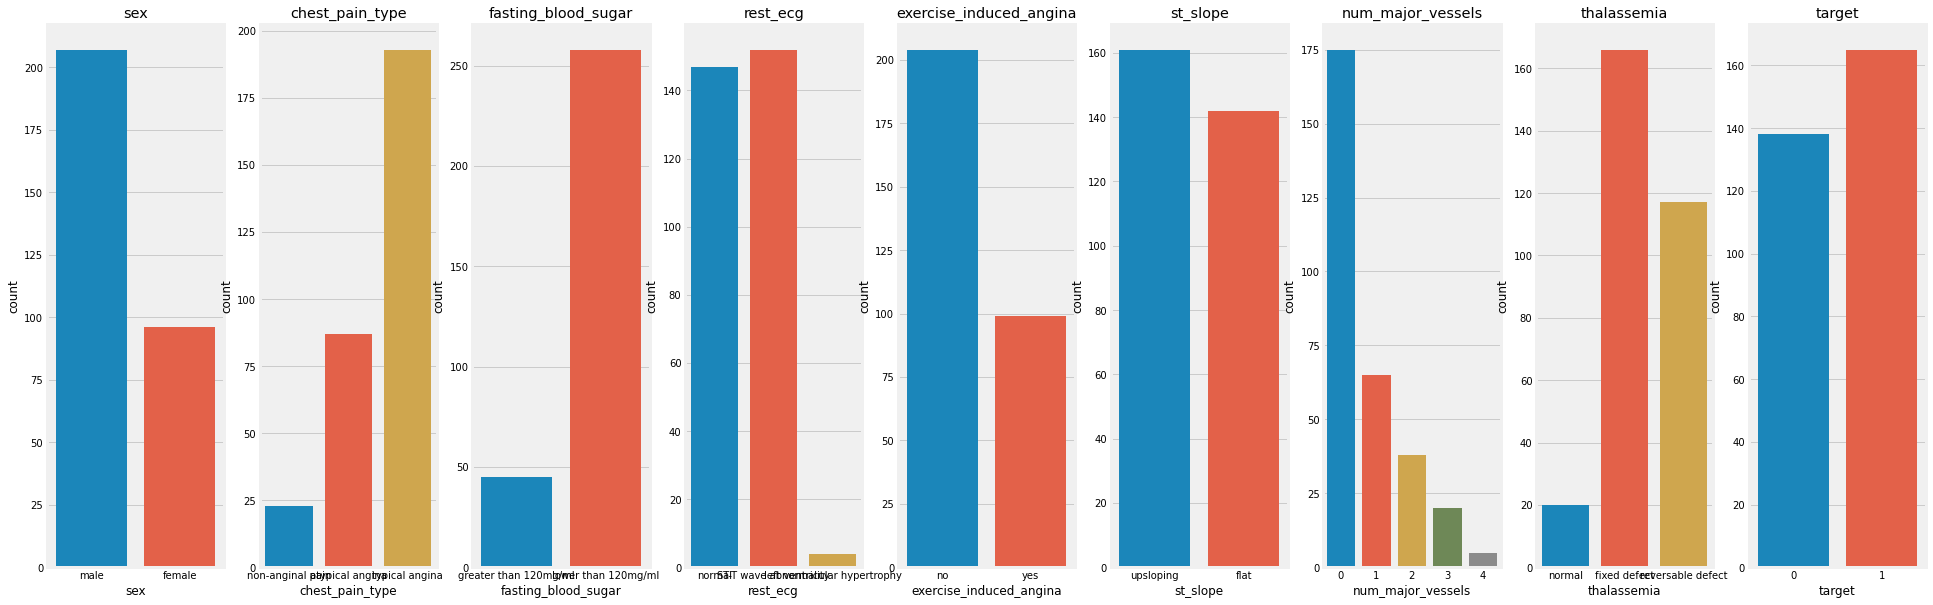

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
f,ax = plt.subplots(1,9,figsize = (30,10))
sns.countplot('sex',data=data,ax=ax[0])
ax[0].set_title('sex')
sns.countplot('chest_pain_type',data=data,ax=ax[1])
ax[1].set_title('chest_pain_type')
sns.countplot('fasting_blood_sugar',data=data,ax=ax[2])
ax[2].set_title('fasting_blood_sugar')
sns.countplot('rest_ecg',data=data,ax=ax[3])
ax[3].set_title('rest_ecg')
sns.countplot('exercise_induced_angina',data=data,ax=ax[4])
ax[4].set_title('exercise_induced_angina')
sns.countplot('st_slope',data=data,ax=ax[5])
ax[5].set_title('st_slope')
sns.countplot('num_major_vessels',data=data,ax=ax[6])
ax[6].set_title('num_major_vessels')
sns.countplot('thalassemia',data=data,ax=ax[7])
ax[7].set_title('thalassemia')
sns.countplot('target',data=data,ax=ax[8])
ax[8].set_title('target')
plt.show()

In [113]:
## Ваш ответ:
dis_f.sort_values('disbalance',ascending=False)

,feature,disbalance
3,rest_ecg,38.000000
6,num_major_vessels,35.000000
1,chest_pain_type,8.391304
7,thalassemia,8.300000
2,fasting_blood_sugar,5.733333
0,sex,2.156250
4,exercise_induced_angina,2.060606
8,target,1.195652
5,st_slope,1.133803


---